# PRÁCTICA 2 || TIV

Primaremente importaremos todos los recursos necesarios para el desarrollo de la práctica.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate
from scipy.ndimage import prewitt, sobel, laplace

from skimage import filters
from skimage.data import camera
from skimage.util import random_noise
from skimage import feature

C:\Users\fmaco\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## 1) Leer y representar la imagen gray_bands.tif

Primeramente leemos la imagen y la guardamos en una variable, al igual que se ha venido haciendo en anteriores prácticas, para así poder trabajar con ella:

formato: TIFF
(ancho, alto) = (7200, 2400)
modo:  L


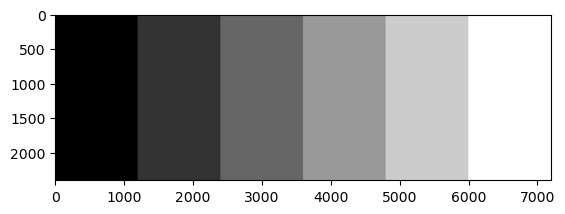

In [2]:
img1 = Image.open('images/gray_bands.tif')

#Se muestran algunas característica de la image a tratar.
print('formato:', img1.format)
print('(ancho, alto) =', img1.size)
print('modo: ', img1.mode)

plt.figure()
plt.imshow(img1, cmap='gray')

In [3]:
#Hay que reducir la imagen, debido a que más adelante nos será molesto trabajar con una imagen de tanto tamaño.
factor = 10
img1_reduc = img1.reduce(factor)
print('(ancho, alto) =', img1_reduc.size)
img1 = np.array(img1_reduc, dtype='float')
img1 = img1/img1.max() #Normalizo la imagen porque me es más cómodo trabajar así. Los motivos se explicaran más adelante.

(ancho, alto) = (720, 240)


## 2) Detectar y representar los bordes con un operador de gradiente

Se va a emplear el operador de gradiente de Prewitt para representar los bordes.

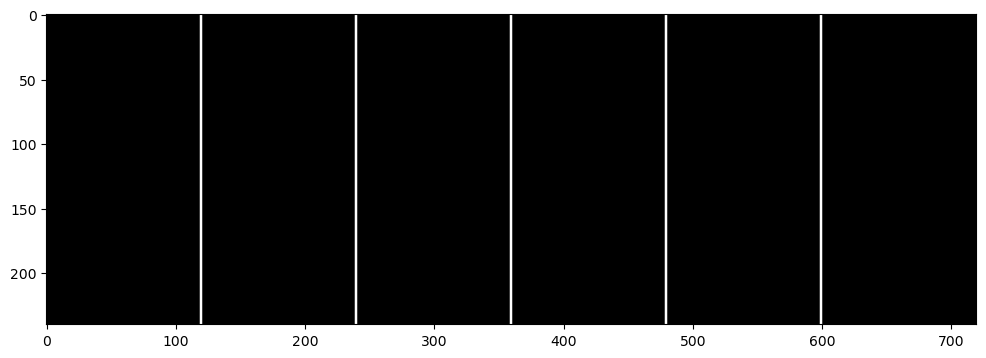

In [4]:
plt.figure(figsize=(12, 6))
img1_prewitt = filters.prewitt(img1) #Esta función es la que permite aplicar dicho operador.
plt.imshow(img1_prewitt, cmap='gray')

## 3) Detectar y representar los bordes con el operador de laplaciana

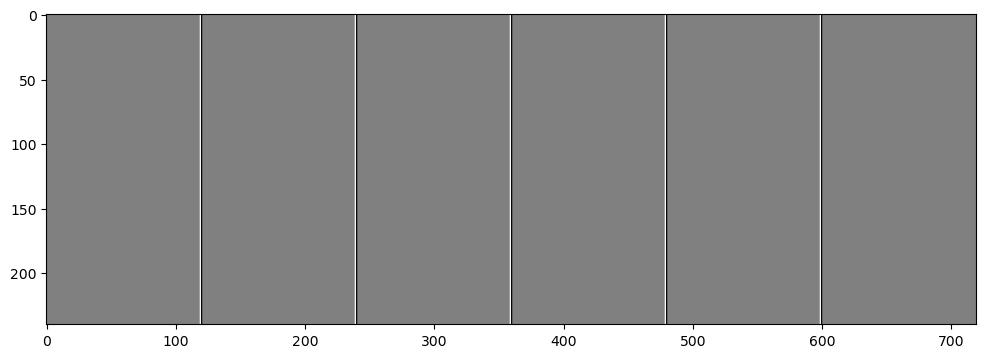

In [5]:
img_lpl = laplace(img1) #Esta función es la que permite aplicar dicho operador.
plt.figure(figsize=(12, 6))
plt.imshow(img_lpl, cmap='gray')

Como resultado obtenemos un borde formado por una banda blanca y negra. Esto se debe a que la laplaciana aplica la segunda derivada, produciendo un salto de 0 a 1, y de 1 a -1. Es por ello que al tener un valor negativo, se le da al 0 un valor de gris como color intermedio entre -1 (negro) y 1 (blanco).

## 4) Añadir ruido gaussiano a la imagen, de media cero y de desviación típica configurable por el usuario. Representar las imágenes

Para este apartado, he decidido generar una función que crea una imagen de ruido gausiano con una desviación típica pasada por los parámetros de dicha función.

In [6]:
def ruidoimg(img, desvtip):
    img = np.array(img, dtype='float') #Se convierte la imagen pasada por parámetros en un array de numpy
    noise = np.random.normal(loc=0.0, scale=desvtip, size= img.shape) #Se genera el ruido (Scale es la desviación típica y Loc es la media)
    img_noise = img + noise #La imagen resultante será la imagen pasada por parámetros + el ruido generado con la desv. típica aportada.
    return img_noise

Trabajo con valores de desviación típica entre 0 y 1 ya que al principio normalice la imagen. Me es más cómodo trabajar con valores de desviación típica normalizados. Y es mucho más intuitivo para el que juega con la función creada a posteriori.

Text(0.5, 1.0, 'Desv. típca 1.0')

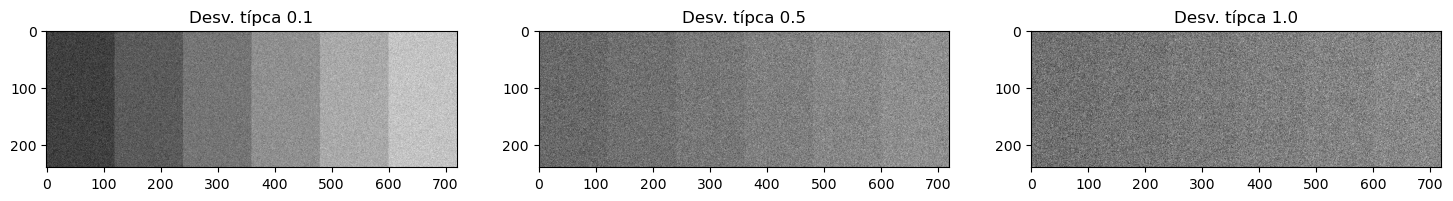

In [7]:
#Se generan tres imágenes con distintos valores de desv. típica
img1_noise = ruidoimg(img1, 0.1)
img2_noise = ruidoimg(img1, 0.5)
img3_noise = ruidoimg(img1, 1.0)
plt.figure(figsize=(18, 12))
plt.subplot(131)
plt.imshow(img1_noise, cmap = 'gray')
plt.title('Desv. típca 0.1')
plt.subplot(132)
plt.imshow(img2_noise, cmap = 'gray')
plt.title('Desv. típca 0.5')
plt.subplot(133)
plt.imshow(img3_noise, cmap = 'gray')
plt.title('Desv. típca 1.0')

## 5) Aplicar los operadores de gradiente y laplaciana a las imágenes ruidosas. ¿Podemos detectar los bordes? Discutir el resultado

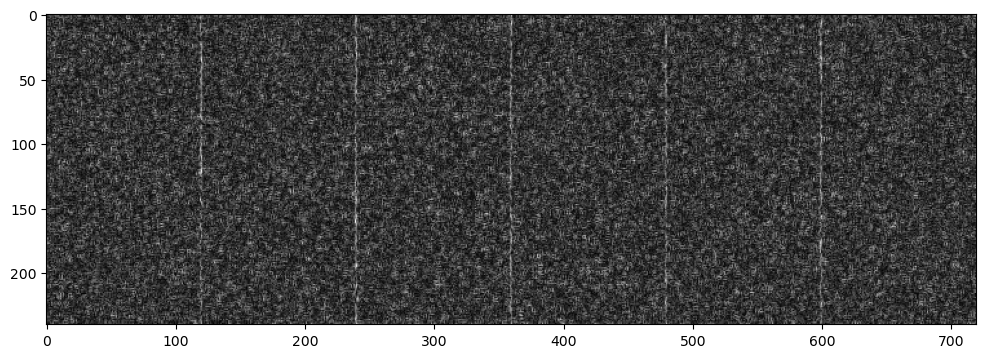

In [8]:
#Aplico operador de prewitt a la img1_noise
plt.figure(figsize=(12, 6))
img1_prewitt_noise = filters.prewitt(img1_noise)
plt.imshow(img1_prewitt_noise, cmap='gray')

Como resultado el operador no solo ha detectado los bordes, sino que también a resltado el ruido, dando una imagen poco satisfactoria para el resultado que queremos conseguir.

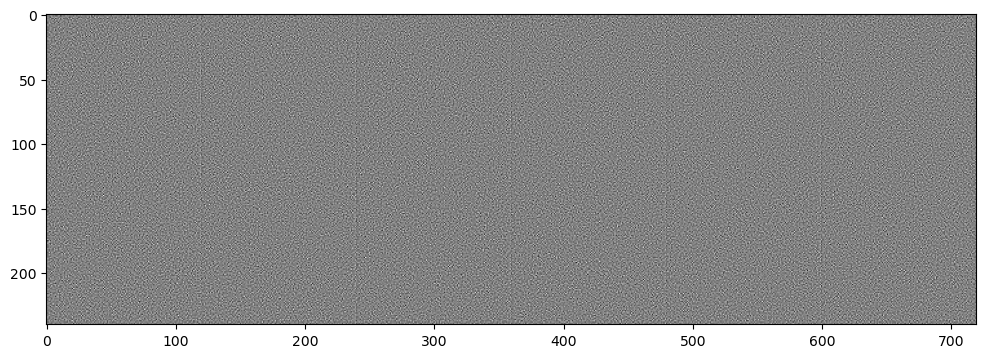

In [9]:
#Aplico operador de laplaciana a la img1_noise
img_lpl_noise = laplace(img1_noise)
plt.figure(figsize=(12, 6))
plt.imshow(img_lpl_noise, cmap='gray')

Lo mismo que con el operador de prewitt, incluso obteniendo peor resultado.

## 6) Aplicar un filtrado Gaussiano a la imagen antes de aplicar los operadores anteriores. ¿Podemos ahora detectar los bordes? Discutir el resultado

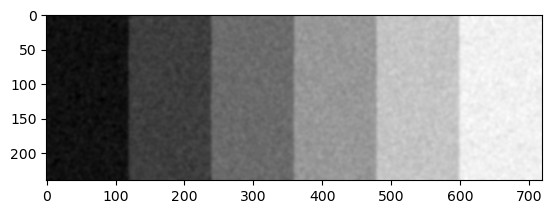

In [10]:
img1_noise_gaussfil = gaussian_filter(img1_noise, 2) #Se aplica el filtro gaussiano a la imagen ruidosa mediante la función gaussian_filter
plt.imshow(img1_noise_gaussfil, cmap='gray')

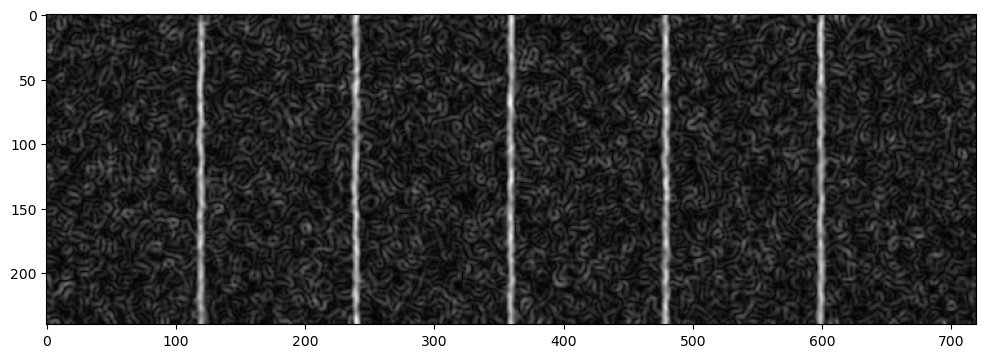

In [11]:
#Aplico operador de prewitt a la img1_noise_gaussfil
plt.figure(figsize=(12, 6))
img1_prewitt_noise = filters.prewitt(img1_noise_gaussfil) #Se aplica el operador de prewitt
plt.imshow(img1_prewitt_noise, cmap='gray')

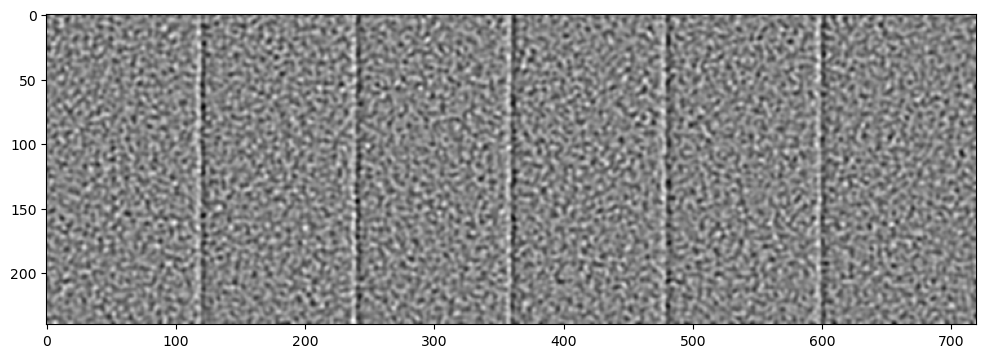

In [12]:
#Aplico operador de laplaciana a la img1_noise_gaussfil
img_lpl_noise = laplace(img1_noise_gaussfil) #Se aplica el operador de laplaciana
plt.figure(figsize=(12, 6))
plt.imshow(img_lpl_noise, cmap='gray')

El resultado obtenido a la hora de detectar los bordes es mucho mejor, pero ambos operadores siguen captando el ruido. Pero dentro de lo que cabe la detección de los bordes de interés es medianamente satisfactoria, ya que estos bordes son bastante distinguibles.

## Aplicar el detector de Canny a las dos imágenes reales (building.tif y head_CT.tif). Discutir el resultado y los parámetros empleados.

En las dos celdas de código siguientes se leen las imágenes y se guardan en dos variables distintas. A su vez también se muestran algunos datos de interés en las imágenes.

formato: TIFF
(ancho, alto) = (1114, 834)
modo:  L


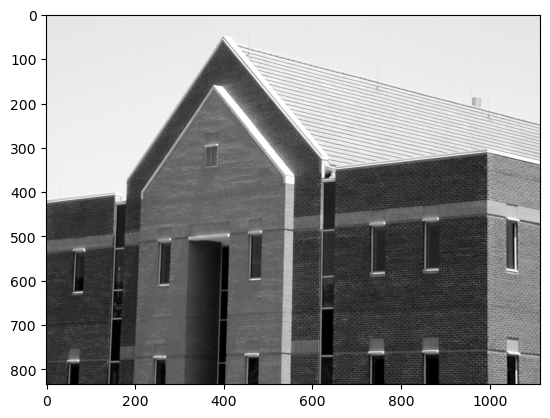

In [13]:
img2 = Image.open('images/building.tif')

print('formato:', img2.format)
print('(ancho, alto) =', img2.size)
print('modo: ', img2.mode)

plt.figure()
plt.imshow(img2, cmap='gray')
img2 = np.array(img2)

formato: TIFF
(ancho, alto) = (512, 512)
modo:  L


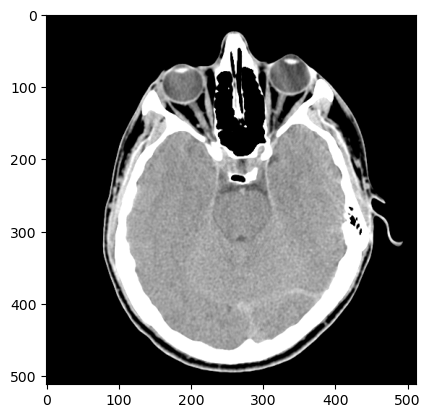

In [14]:
img3 = Image.open('images/head_CT.tif')

print('formato:', img3.format)
print('(ancho, alto) =', img3.size)
print('modo: ', img3.mode)

plt.figure()
plt.imshow(img3, cmap='gray')
img3 = np.array(img3)

In [15]:
#Se aplica el detector de Canny en ambas imágenes.
canny_building = feature.canny(img2, sigma=2) #Valor de sigma 2
canny_head = feature.canny(img3, sigma=1) #Valor de sigma 1

Text(0.5, 1.0, 'Canny filter, $\\sigma=1$')

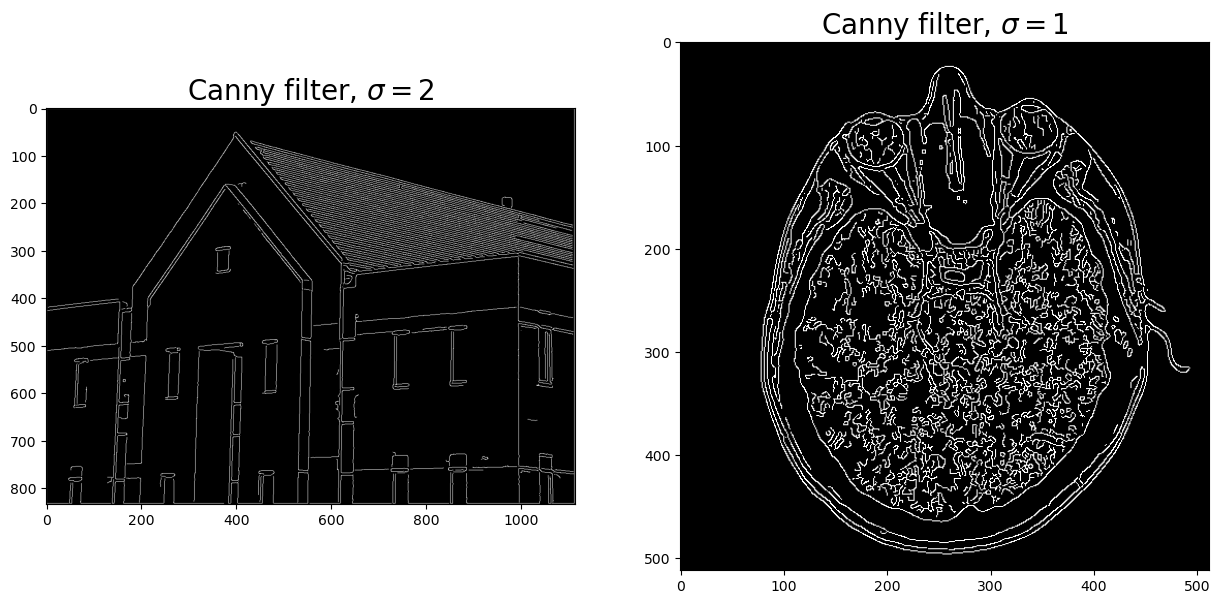

In [16]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.imshow(canny_building, cmap='gray')
plt.title(r'Canny filter, $\sigma=2$', fontsize=20)

plt.subplot(122)
plt.imshow(canny_head, cmap='gray')
plt.title(r'Canny filter, $\sigma=1$', fontsize=20)

En el detector de Canny, con valor de sigma bajo, seremos capaces de detectar con gran precisión todos los bordes. La contrapartida que tiene utilizar un valor de sigma tan bajo, es que si la imagen tuviera ruido se nos acabaría superponiendo ese ruido sobre la imagen de interés. Es por ello que la imagen de la izquierda (la casa) uso un valor de sigma=2, ya que si utilizara una valor de 1 detecta hasta el borde del relieve de los ladrillos de la casa, y en este caso solo pretendo conseguir su silueta (aunque en el tejado se percibe a la perfección todas las tejas de la casa). En la segunda imagen me interesa tener un valor de sigma bajo para detectar con suma precisión todos los contornos de la corteza cerebral.